<a href="https://colab.research.google.com/github/Balajih1994/Image-classification-using-vgg-16/blob/main/Image_classification_usingVGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow

from keras.initializers import glorot_uniform

from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D



import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:


dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [3]:

data_dir

'./datasets/flower_photos'

In [4]:

import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:


list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/4495885281_fe2a3b671d.jpg'),
 PosixPath('datasets/flower_photos/roses/7302931078_30054c1970_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8742493617_c2a9bf854f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5159317458_bbb22e2f65_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1445228333_59a07e0801.jpg')]

In [6]:


image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)
     

3670


In [7]:


roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4495885281_fe2a3b671d.jpg'),
 PosixPath('datasets/flower_photos/roses/7302931078_30054c1970_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8742493617_c2a9bf854f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5159317458_bbb22e2f65_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1445228333_59a07e0801.jpg')]

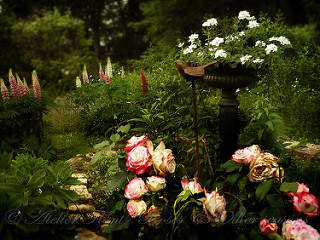

In [8]:

PIL.Image.open(str(roses[1]))


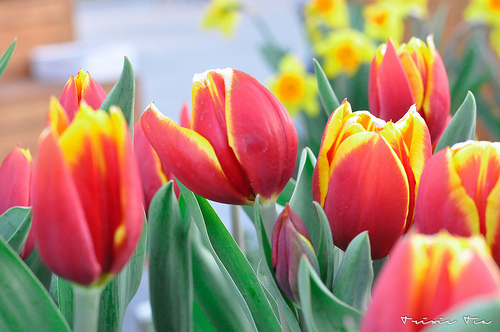

In [9]:


tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [10]:


flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:



flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/4495885281_fe2a3b671d.jpg'),
 PosixPath('datasets/flower_photos/roses/7302931078_30054c1970_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8742493617_c2a9bf854f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5159317458_bbb22e2f65_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1445228333_59a07e0801.jpg')]

In [13]:


str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/4495885281_fe2a3b671d.jpg'

In [14]:



img = cv2.imread(str(flowers_images_dict['roses'][0]))
     

In [15]:


img.shape

(333, 500, 3)

In [16]:


cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [17]:

X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:


X = np.array(X)
y = np.array(y)
     

In [19]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:


X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [21]:
X_train_scaled.shape

(2752, 224, 224, 3)

In [22]:
X_test_scaled.shape

(918, 224, 224, 3)

In [23]:
y_train.shape

(2752,)

In [24]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=5, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [25]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)   

Epoch 1/30


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


86/86 [==============================] - 53s 444ms/step - loss: 1.6207 - accuracy: 0.2427
Epoch 2/30
86/86 [==============================] - 37s 436ms/step - loss: 1.6027 - accuracy: 0.2402
Epoch 3/30
86/86 [==============================] - 37s 433ms/step - loss: 1.6026 - accuracy: 0.2442
Epoch 4/30
86/86 [==============================] - 37s 432ms/step - loss: 1.6014 - accuracy: 0.2442
Epoch 5/30
86/86 [==============================] - 37s 433ms/step - loss: 1.6012 - accuracy: 0.2442
Epoch 6/30
86/86 [==============================] - 37s 432ms/step - loss: 1.6013 - accuracy: 0.2442
Epoch 7/30
86/86 [==============================] - 37s 432ms/step - loss: 1.6015 - accuracy: 0.2442
Epoch 8/30
86/86 [==============================] - 37s 432ms/step - loss: 1.6014 - accuracy: 0.2442
Epoch 9/30
86/86 [==============================] - 37s 431ms/step - loss: 1.6013 - accuracy: 0.2442
Epoch 10/30
86/86 [==============================] - 37s 431ms/step - loss: 1.6011 - accuracy: 0.2442


In [26]:



model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 7s 224ms/step - loss: 1.6021 - accuracy: 0.2462


[1.6020700931549072, 0.24618735909461975]

In [27]:



predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 4s 150ms/step


array([[0.16847146, 0.17725858, 0.24031886, 0.2010369 , 0.21291421],
       [0.16847146, 0.17725858, 0.24031886, 0.2010369 , 0.21291421],
       [0.16847146, 0.17725858, 0.24031886, 0.2010369 , 0.21291421],
       ...,
       [0.16847146, 0.17725858, 0.24031886, 0.2010369 , 0.21291421],
       [0.16847146, 0.17725858, 0.24031886, 0.2010369 , 0.21291421],
       [0.16847146, 0.17725858, 0.24031886, 0.2010369 , 0.21291421]],
      dtype=float32)

In [28]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.19372846, 0.19543828, 0.20815957, 0.20014116, 0.20253247],
      dtype=float32)>

In [29]:

print("The test label is:", y_test[0])

The test label is: 1


In [30]:

max_confidence = np.argmax(predictions[0])
max_confidence

2